In [2]:
#import basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [4]:
#read the data

df=pd.read_csv("/content/sample_data/marketing_AB.csv")

In [5]:
#check first few observation
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [6]:
#check if we have duplicates with respect to user id
df.duplicated(subset = 'user id').sum()

0

In [7]:
df.drop(['Unnamed: 0', 'user id'], axis=1, inplace=True)

In [9]:
df.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [8]:
#check if the categorical variables have appropriate number of levels
df_cat = df[['test group', 'converted','most ads day','most ads hour']]
df_cat.nunique()

test group        2
converted         2
most ads day      7
most ads hour    24
dtype: int64

In [10]:
#checking each category in deep
for i in df_cat.columns:
  print(i.upper(), ":", np.sort(df_cat[i].unique()))

TEST GROUP : ['ad' 'psa']
CONVERTED : [False  True]
MOST ADS DAY : ['Friday' 'Monday' 'Saturday' 'Sunday' 'Thursday' 'Tuesday' 'Wednesday']
MOST ADS HOUR : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]



**Univariate Analysis**

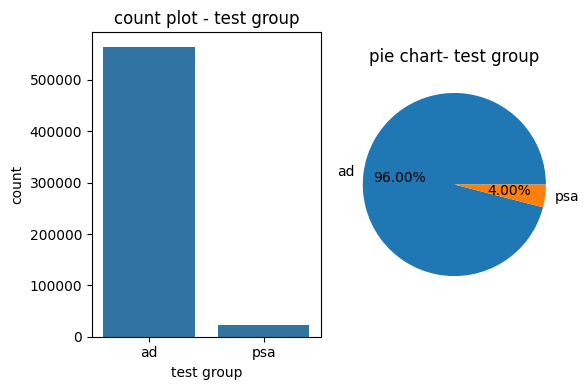

In [11]:
variable = 'test group'

plt.figure(figsize=(6,4))

#count plot
plt.subplot(1,2,1)
sns.countplot(x=variable,data=df_cat)
plt.title(f'count plot - {variable}')


#pie chart
plt.subplot(1,2,2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels = counts.index, autopct='%0.2f%%')
plt.title(f'pie chart- {variable}')

#adjust layout
plt.tight_layout()

#show the plots
plt.show()

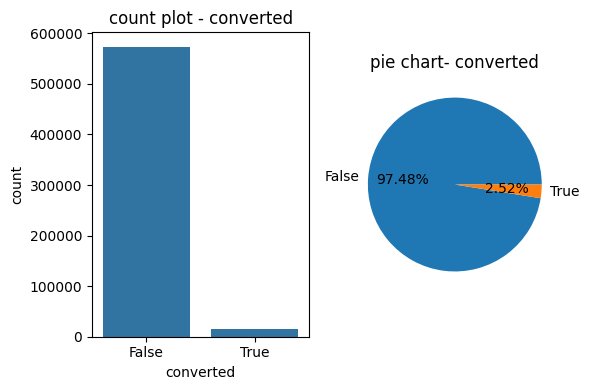

In [12]:
variable = 'converted'

plt.figure(figsize=(6,4))

#count plot
plt.subplot(1,2,1)
sns.countplot(x=variable,data=df_cat)
plt.title(f'count plot - {variable}')


#pie chart
plt.subplot(1,2,2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels = counts.index, autopct='%0.2f%%')
plt.title(f'pie chart- {variable}')

#adjust layout
plt.tight_layout()

#show the plots
plt.show()

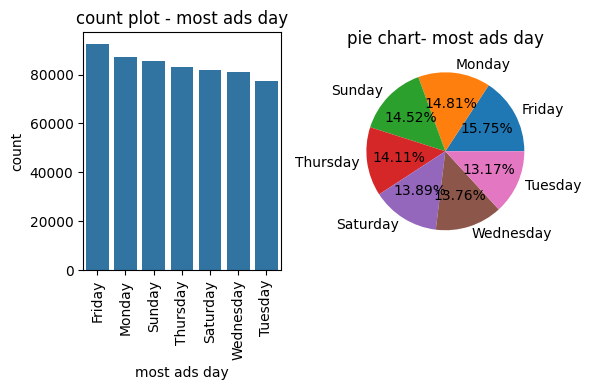

In [13]:
variable = 'most ads day'

plt.figure(figsize=(6,4))

#count plot
plt.subplot(1,2,1)
sns.countplot(x=variable,data=df_cat, order = df_cat['most ads day'].value_counts().index)
plt.title(f'count plot - {variable}')
plt.xticks(rotation =90)


#pie chart
plt.subplot(1,2,2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels = counts.index, autopct='%0.2f%%')
plt.title(f'pie chart- {variable}')

#adjust layout
plt.tight_layout()

#show the plots
plt.show()

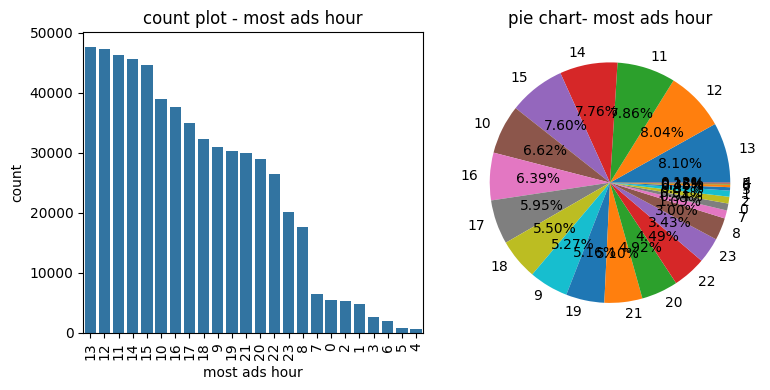

In [14]:
variable = 'most ads hour'

plt.figure(figsize=(8,4))

#count plot
plt.subplot(1,2,1)
sns.countplot(x=variable,data=df_cat, order = df_cat['most ads hour'].value_counts().index)
plt.title(f'count plot - {variable}')
plt.xticks(rotation =90)


#pie chart
plt.subplot(1,2,2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels = counts.index, autopct='%0.2f%%')
plt.title(f'pie chart- {variable}')

#adjust layout
plt.tight_layout()

#show the plots
plt.show()

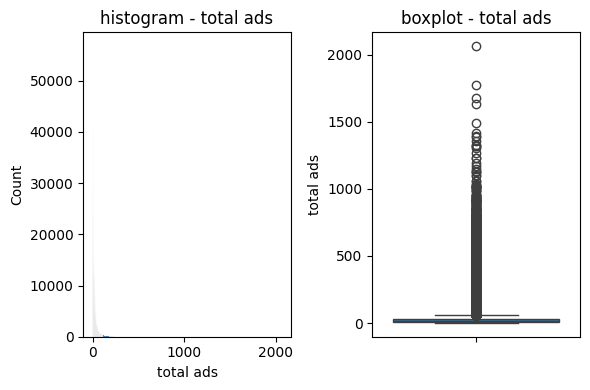

In [15]:
variable = 'total ads'

plt.figure(figsize=(6,4))

#histogram
plt.subplot(1,2,1)
sns.histplot(x=variable,data=df)
plt.title(f'histogram - {variable}')



#boxplot
plt.subplot(1,2,2)
sns.boxplot(y= variable, data =df)
plt.title(f'boxplot - {variable}')

#adjust layout
plt.tight_layout()

#show the plots
plt.show()

In [16]:
#Let's check the descriptive stats of this feature
df['total ads'].describe()

count    588101.000000
mean         24.820876
std          43.715181
min           1.000000
25%           4.000000
50%          13.000000
75%          27.000000
max        2065.000000
Name: total ads, dtype: float64

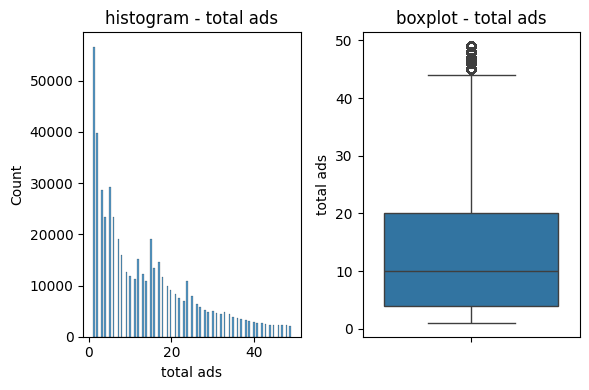

In [17]:
variable = 'total ads'

plt.figure(figsize=(6,4))

#histogram
plt.subplot(1,2,1)
#filtering the data for a value close to 75th percentile only for better visualization
sns.histplot(x=variable,data=df[df['total ads']< 50])
plt.title(f'histogram - {variable}')



#boxplot
plt.subplot(1,2,2)
sns.boxplot(y= variable, data =df[df['total ads']< 50])
plt.title(f'boxplot - {variable}')

#adjust layout
plt.tight_layout()

#show the plots
plt.show()

**Bivariate analysis**

In [18]:
df.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [19]:
ct_conversion_test_group = pd.crosstab(df['test group'], df['converted'], normalize = 'index')
ct_conversion_test_group

converted,False,True
test group,,
ad,0.974453,0.025547
psa,0.982146,0.017854


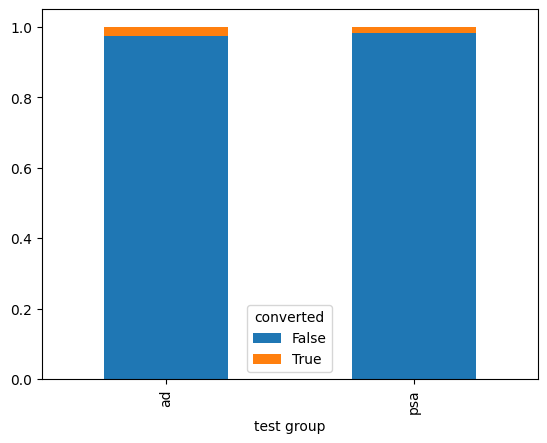

In [20]:
ct_conversion_test_group.plot.bar(stacked = True);

converted        False     True 
most ads day                    
Monday        0.967188  0.032812
Tuesday       0.970160  0.029840
Wednesday     0.975058  0.024942
Sunday        0.975524  0.024476
Friday        0.977788  0.022212
Thursday      0.978429  0.021571
Saturday      0.978949  0.021051


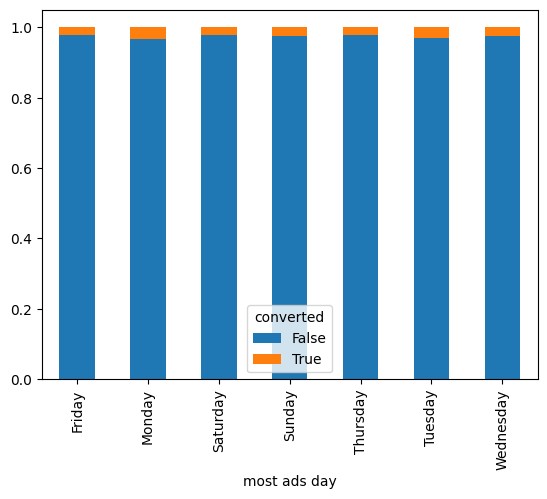

In [21]:
ct_conversion_day = pd.crosstab(df['most ads day'], df['converted'], normalize= 'index')
print(ct_conversion_day.sort_values(by = True, ascending = False))
ct_conversion_day.plot.bar(stacked = True);

converted         False     True 
most ads hour                    
16             0.969228  0.030772
20             0.970197  0.029803
15             0.970347  0.029653
21             0.971077  0.028923
17             0.971790  0.028210
14             0.971937  0.028063
18             0.972620  0.027380
19             0.973280  0.026720
22             0.973895  0.026105
13             0.975323  0.024677
12             0.976172  0.023828
23             0.977338  0.022662
6              0.977756  0.022244
11             0.977884  0.022116
10             0.978479  0.021521
5              0.979085  0.020915
8              0.980484  0.019516
9              0.980809  0.019191
0              0.981575  0.018425
7              0.981889  0.018111
4              0.984765  0.015235
1              0.987089  0.012911
3              0.989548  0.010452
2              0.992687  0.007313


<Axes: xlabel='most ads hour'>

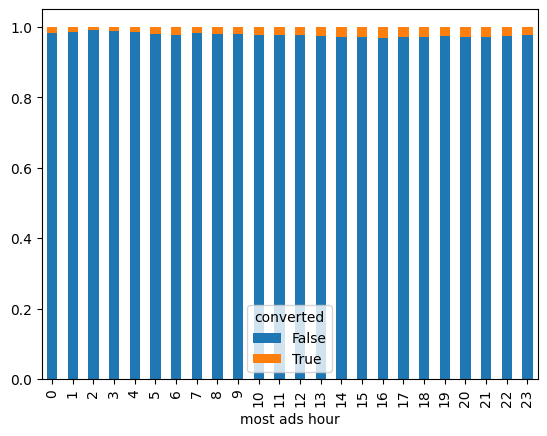

In [22]:
ct_conversion_hour = pd.crosstab(df['most ads hour'], df['converted'], normalize = 'index')
print(ct_conversion_hour.sort_values(by = True, ascending = False))
ct_conversion_hour.plot.bar(stacked = True)

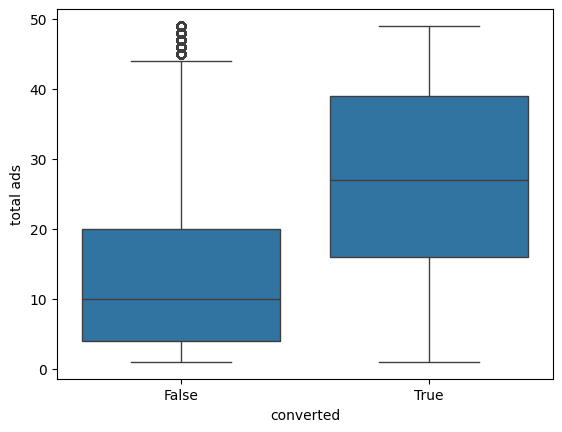

In [23]:
sns.boxplot(x= 'converted', y ='total ads', data = df[df['total ads']< 50]);

**Statistical Tests**

In [24]:
from scipy.stats import chi2_contingency
alpha = 0.05
for variable in df_cat.columns:
  if variable != 'converted':
    #create a contingency table (cross-tabulation)
    contingency_table = pd.crosstab(df_cat[variable], df_cat['converted'])

    #perform chi-squarred test
    chi2, p, _, _ = chi2_contingency(contingency_table)

    #display the results
    print(f"\nChi-squared test for {variable} vs. converted")
    print(f"Chi-squared value: {chi2}")
    print(f"p-value: {p}")

    #check for significance
    if p < alpha:
      print(f"the difference in cinverison rates across {variable} is statistically significant.")
    else:
      print(f"There is no significant difference in conversion rates accross {variable}.")


Chi-squared test for test group vs. converted
Chi-squared value: 54.005823883685245
p-value: 1.9989623063390075e-13
the difference in cinverison rates across test group is statistically significant.

Chi-squared test for most ads day vs. converted
Chi-squared value: 410.0478857936585
p-value: 1.932184379244731e-85
the difference in cinverison rates across most ads day is statistically significant.

Chi-squared test for most ads hour vs. converted
Chi-squared value: 430.76869230822086
p-value: 8.027629823696771e-77
the difference in cinverison rates across most ads hour is statistically significant.


In [25]:
df_cat.columns

Index(['test group', 'converted', 'most ads day', 'most ads hour'], dtype='object')

In [27]:
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu


#step 1: check assumptions
#normality assumption
shapiro_stat_true, shapiro_p_value_true = shapiro(df[df['converted'] == True]['total ads'])
shapiro_stat_false, shapiro_p_value_false = shapiro(df[df['converted'] == False]['total ads'])

print(f"Shapiro-Wilk test for nomality (True group): p-value = {shapiro_p_value_true}")
print(f"Shapiro-Wilk test for nomality (False group): p-value = {shapiro_p_value_false}")


#Equality of variances assumption
levene_stat, levene_p_value = levene(df[df['converted']]['total ads'], df[~df['converted']]['total ads'])
print(f"Levene's test for equality of variances: p-value = {levene_p_value}")

Shapiro-Wilk test for nomality (True group): p-value = 0.0
Shapiro-Wilk test for nomality (False group): p-value = 0.0
Levene's test for equality of variances: p-value = 0.0


In [28]:
#Step 2 perform a suitable test
alpha = 0.05
if shapiro_p_value_true > alpha and shapiro_p_value_false > alpha and levene_p_value > alpha:
  #assumptions met - use t-test for means
  t_stat, t_p_value = ttest_ind(df[df['converted']]['total ads'], df[~df['converted']]['total ads'])
  print(f"Independent teo-sample t-test: p-value = {t_p_value}")

else:
  #assumptions not met - use Mann-Whitney U test for medians
  u_stat, u_p_value = mannwhitneyu(df[df['converted']]['total ads'], df[~df['converted']]['total ads'])
  print(f"Mann-Whitney U test: p-vlaue = {u_p_value}")

Mann-Whitney U test: p-vlaue = 0.0
